#### Demostración de info para hallar ángulo de fase de la fuente 

In [ ]:
with open("IEEE34_form1_loads.atp", "r+") as f:
    lines = f.readlines()
lines_copy = lines.copy()
for idx, line in enumerate(lines_copy):
    if 'C Load' in line:
        if '3f' in line:
            print(line, end='')
            print(f" Fase A carga trifásica/bifásica: {lines_copy[idx + 1]}", end='')
            print(f" Fase B carga trifásica/bifásica: {lines_copy[idx + 2]}", end='')
            print(f" Fase C carga trifásica/bifásica: {lines_copy[idx + 3]}", end='')
        else:
            print(line, end='')
            print(f" Fase A carga monofásica: {lines_copy[idx + 1]}", end='')



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
load_low = 80
load_high = 120
max_load_step = 5
events_amount = 1000

initial_load_values = np.around(np.random.uniform(load_low, load_high, events_amount), 2)
counts, bins = np.histogram(initial_load_values)

In [ ]:

plt.hist(bins[:-1], bins, weights=counts)
plt.title('Distribución valores iniciales')

plt.show()

In [ ]:
load_values = initial_load_values.copy()
print(load_values[600])
print(initial_load_values[600])
initial_load_values[600] = 0.5
print(load_values[600])
print(initial_load_values[600])


higher_values_idx = np.where(load_values > load_high - max_load_step)
higher_values = initial_load_values[higher_values_idx]
load_values = np.delete(load_values, higher_values_idx)


In [ ]:
lower_values_idx = np.where(load_values < load_low + max_load_step)
lower_values = initial_load_values[lower_values_idx]
load_values = np.delete(load_values, lower_values_idx)


In [ ]:
def target_load(initial_load: np.ndarray, load_high: float, load_low: float, max_load_step: float)-> float:
    """Takes initual load perctentage and returns target load percentage

    Parameters
    ----------
    initial_load : np.ndarray
        Initial load percentage
    load_high : float
        Upper load percentage limit.
    load_low : float
        Lower load percentage limit.
    max_load_step : float
        Max percentage difference between initial_load and target load

    Returns
    -------
    float
        target load percentage
    """
    max_val = initial_load + max_load_step
    min_val = initial_load - max_load_step
    if initial_load > load_high - max_load_step:
        return np.random.uniform(min_val, load_high)
    elif initial_load < load_low + max_load_step:
        return np.random.uniform(load_low, max_val)
    else:
        return np.random.uniform(min_val, max_val)

target_load_vect = np.vectorize(target_load)

In [ ]:
final_values = target_load_vect(initial_load_values, load_high, load_low, max_load_step)
final_values = np.around(final_values, 2)

In [ ]:
print(np.where(final_values > load_high - max_load_step)[0].shape)

In [ ]:
print(np.where(initial_load_values > load_high - max_load_step)[0].shape)

In [ ]:

counts, bins = np.histogram(final_values)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Distribución valores finales')

plt.show()

In [ ]:


with open("IEEE34_form1_loads.atp", "r+") as f:
    lines = f.readlines()
lines_copy = lines.copy()
def loop():
    for idx, line in enumerate(lines_copy):
        if 'C Load' in line:
            if '3f' in line:
                print(line, end='')
                print(f" Fase A carga trifásica/bifásica: {lines_copy[idx + 1]}", end='')
                print(f" Fase B carga trifásica/bifásica: {lines_copy[idx + 2]}", end='')
                print(f" Fase C carga trifásica/bifásica: {lines_copy[idx + 3]}", end='')
            else:
                print(line, end='')
                print(f" Fase A carga monofásica: {lines_copy[idx + 1]}", end='')

%timeit loop()

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# Validación suma admitancias serie
with open("IEEE34_form1_loads.atp", "r+") as f:
    lines = f.readlines()
lines_copy = lines.copy()
three_phase_loads = []
Ztri = np.empty()
Za = np.empty((0,3))
Zb = np.empty((0,3))
Zc = np.empty((0,3))

Ztotal = 0
for idx, line in enumerate(lines_copy):
    if "C Load" in line:
        if "3f" in line:
            print(lines_copy[idx + 1], end="")
            print(lines_copy[idx + 2], end="")
            print(lines_copy[idx + 3], end="")
            Ra = float(lines_copy[idx + 1][30:42])
            Xa = float(lines_copy[idx + 1][46:58])
            za = Ra + Xa * 1j
            print(za)
            Rb = float(lines_copy[idx + 2][30:42])
            Xb = float(lines_copy[idx + 2][46:58])
            zb = Rb + Xb * 1j
            print(zb)
            Rc = float(lines_copy[idx + 3][30:42])
            Xc = float(lines_copy[idx + 3][46:58])
            zc = Rc + Xc * 1j
            print(zc)
            # print(line, end='')
            # print(f" Fase A carga trifásica/bifásica: {lines_copy[idx + 1]}", end='')
            # print(f" Fase B carga trifásica/bifásica: {lines_copy[idx + 2]}", end='')
            # print(f" Fase C carga trifásica/bifásica: {lines_copy[idx + 3]}", end='')
        else:
            pass
            # if ' A' in line:
            #     print('fase A')
            # if ' B' in line:
            #     print('fase B')
            # if ' C' in line:
            #     print('fase C')
            # R = float(lines_copy[idx + 1][30:42])
            # X = float(lines_copy[idx + 1][46:58])
            # z = R + X * 1j
            # Ztotal += 1/z
            # Z = np.append(Z, 1/z)
            # # # Print Values
            # print(line, end="")
            # print(f" Fase A carga monofásica: {lines_copy[idx + 1]}", end='')
            # print(f"R: {lines_copy[idx + 1][30:42]}")
            # print(f"X: {lines_copy[idx + 1][46:58]}")


  X0072A                      6300.9146341    5040.7317073                     0
  X0072B                      6300.9146341    5040.7317073                     0
  X0072C                      6300.9146341    5040.7317073                     0
(6300.9146341+5040.7317073j)
(6300.9146341+5040.7317073j)
(6300.9146341+5040.7317073j)
  N840A                       14307.923077    11128.384615                     0
  N840B                       14307.923077    11128.384615                     0
  N840C                       14307.923077    11128.384615                     0
(14307.923077+11128.384615j)
(14307.923077+11128.384615j)
(14307.923077+11128.384615j)
  N844A                       953.86153846    741.89230769                     0
  N844B                       953.86153846    741.89230769                     0
  N844C                       953.86153846    741.89230769                     0
(953.86153846+741.89230769j)
(953.86153846+741.89230769j)
(953.86153846+741.89230769j)
  N830A N8

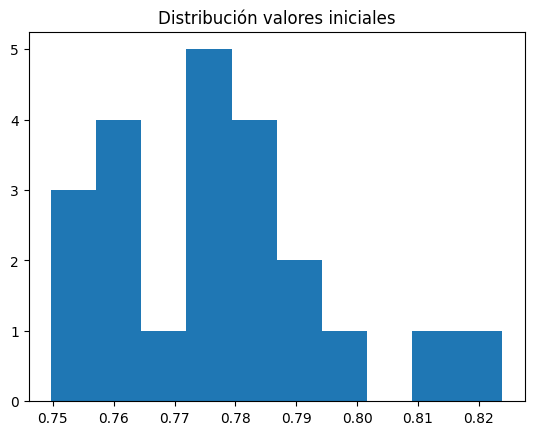

Promedio de las cargabilidades iniciales individuales: 0.7768938817758756
Cargabilidad mínima: 0.7497, cargabilidad máxima: 0.8238


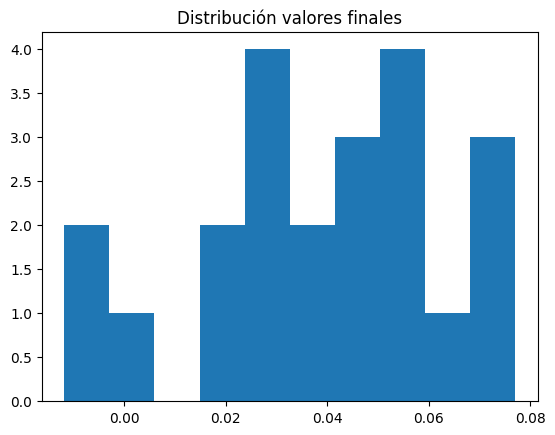

Promedio de las cargabilidades finales individuales: 0.03914057422878903
Cargabilidad mínima: -0.01184, cargabilidad máxima: 0.07706


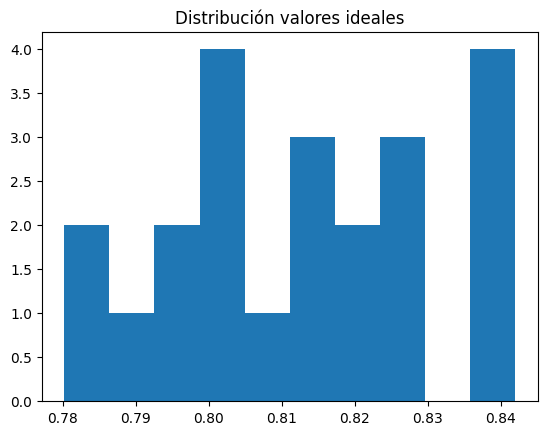

Promedio de las cargabilidades ideales individuales: 0.8127207658215408
Cargabilidad mínima: 0.7802, cargabilidad máxima: 0.842
0.030369686067999738
Cargabilidad promedio método 1: 0.8072635678438753
Cargabilidad promedio ideal: 0.8127207658215408


In [108]:
cargabilidad_inicial = 0.78
cargabilidad_final = 0.82
delta_cargabilidad = cargabilidad_final - cargabilidad_inicial

load_amount = len(Z)
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def plot_hist(data, title):
    counts, bins = np.histogram(data)
    plt.hist(bins[:-1], bins, weights=counts)
    plt.title(f"Distribución valores {title}")
    plt.show()
    print(f"Promedio de las cargabilidades {title} individuales: {np.mean(data)}")
    print(
        f"Cargabilidad mínima: {min(data):0.4}, cargabilidad máxima: {max(data):0.4}"
    )
    

initial_load = (
    get_truncated_normal(mean=cargabilidad_inicial * 100, sd=2, low=30, upp=200).rvs(load_amount) / 100
)
target_load = (
    get_truncated_normal(mean=delta_cargabilidad * 100, sd=2, low=-10, upp=10).rvs(load_amount) / 100
)
real_target_load = (
    get_truncated_normal(mean=cargabilidad_final * 100, sd=2, low=-30, upp=200).rvs(load_amount) / 100
)
# Graficar la nueva distribución de datos
plot_hist(initial_load, "iniciales")


plot_hist(target_load, "finales")


plot_hist(real_target_load, "ideales")


print(np.mean(target_load*initial_load))
print(f"Cargabilidad promedio método 1: {np.mean(initial_load + target_load*initial_load)}")
print(f"Cargabilidad promedio ideal: {np.mean(real_target_load)}")

In [109]:
a = real_target_load - initial_load
b = target_load*initial_load

print(max(a))
print(max(b))

0.0777244968666767
0.05949567888335776


In [79]:
Ztotal_2 = Ztotal * cargabilidad
print(Ztotal)
print(Ztotal_2)
print(np.sum(new_perc*Z))
print(np.abs(np.sum(new_perc*Z)/Ztotal_2))

(0.001461266753749095-0.0007403106401551373j)
(0.002191900130623642-0.001110465960232706j)
(0.002196840366355296-0.0011130047254899534j)
1.002260468529957


### Validación obtención admitancias 

##### Suposiciones:

- El voltaje en todos los nodos es igual al voltaje nominal
- Las fases están balanceadas
- La cargabilidad del sistema está solo determinado por las cargas (i.e. no se consideran pérdidas en líneas ni otros elementos.)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# Crear aleatoriamente las cargas
R = np.random.triangular(0.01, 0.5, 0.9, 100)
X = np.random.triangular(0.01, 0.9, 0.9, 100)
Z = R + X * 1j
Y = 1 / Z
Yt = np.sum(Y)


In [ ]:
# Crear aleatoriamente las nuevas cargas, individualmente
# a partir de una distribución normal truncada
cargabilidad = 0.4
loads_amount = len(Y)
new_perc = np.random.triangular(0.3, cargabilidad, 2, loads_amount)
Yt2 = Yt * cargabilidad


def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)


new_perc = (
    get_truncated_normal(mean=cargabilidad * 100, sd=2, low=30, upp=200).rvs(100) / 100
)


In [ ]:
# Graficar la nueva distribución de datos
counts, bins = np.histogram(new_perc)
plt.hist(bins[:-1], bins, weights=counts)
plt.title("Distribución valores finales")
print(f"Promedio de las nuevas cargabilidades individuales: {np.mean(new_perc)}")
print(
    f"Cargabilidad mínima: {min(new_perc):0.4}, cargabilidad máxima: {max(new_perc):0.4}"
)
plt.show()


In [ ]:
Ynew = Y * new_perc
print(f"Promedio nueva distribución de cargabilidad: {np.abs(np.mean(Ynew)/np.mean(Y)):.3%}")
print(f"Impedancia cargabilidad {cargabilidad:.1%}: {np.sum(Ynew):.4}")

In [ ]:
print(f"Impedancia Cargabilidad Nominal (100%): {Yt:.4}")
print(f"Impedancia Cargabilidad {cargabilidad:.1%}: {Yt2:.4}")